# **Optimizer**
- Optimizer의 종류
  - Gradient Descent (경사하강법)
    - Batch Gradient Descent : 가장 기본적인 경사하강법. 한 번의 업데이트에 모든 데이터가 계산에 포함되므로 느리다.
    - Stochastic Gradient Descent : 확률 경사하강법. 한 번의 업데이트를 위해 하나의 훈련데이터를 사용하므로 Batch Gradient Descent보다 빠르다. 대신 경사가 들쭉날쭉한 크기를 가진다.
    - Mini-batch Gradient Descent : 딥러닝에서 가장 많이 사용되는 방법. batch-size로 배치의 크기를 결정한다. 경사의 크기도 안정되어 있으며 Batch Gradient Descent보다 빠르다.
  - Gradient Descent의 개선 및 파생형
    - Momentum
    - Nesterov Accelerated Gradient
    - Adagrad
    - Adadelta
    - RMSprop
    - Adam
    - AdaMax
    - NAdam
####<br>
- Batch Gradient Descent의 문제점
  - 적절한 learning rate를 설정해주어야 한다.
  - 모든 파라미터에 대해 동일한 learning rate를 적용해준다.
  - local minimum이나 saddle point에서 빠져나오기 힘들다.
  - 이런 문제점을 해결, 개선하기 위하여 다양한 파생형이 등장하였다.
####<br>
- Reference: https://hiddenbeginner.github.io/deeplearning/2019/09/22/optimization_algorithms_in_deep_learning.html

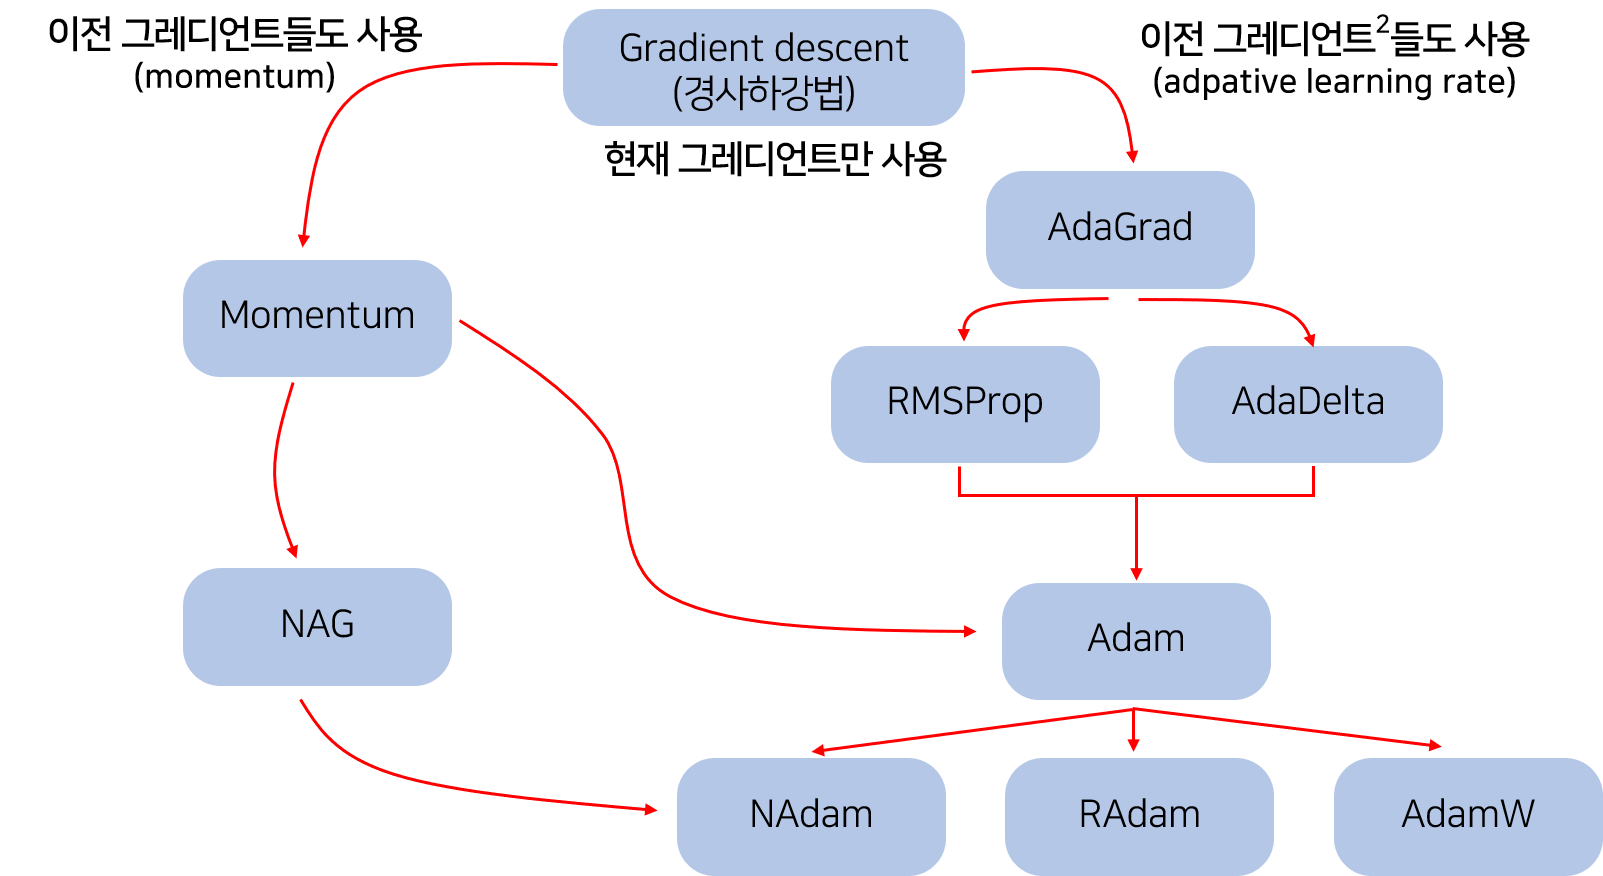

# 기반 코드
Iris 분류 - Adam 옵티마이저


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/iris.csv

--2020-06-26 06:48:10--  https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2020-06-26 06:48:10 (41.1 MB/s) - ‘iris.csv’ saved [2720/2720]



In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
septal_length    120 non-null float64
septal_width     120 non-null float64
petal_length     120 non-null float64
petal_width      120 non-null float64
setosa           120 non-null int64
versicolor       120 non-null int64
virginica        120 non-null int64
dtypes: float64(4), int64(3)
memory usage: 6.6 KB


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=200, verbose=0)

In [ ]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)


20/20 [==============================] - 0s 3ms/sample - loss: 0.1111 - acc: 1.0000
loss : 0.1110994964838028
acc : 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.6755344e-01 3.2389157e-02 5.7401456e-05]
 [1.0331892e-01 8.1449860e-01 8.2182437e-02]
 [9.1605669e-01 8.3343677e-02 5.9960125e-04]
 [6.4794928e-02 8.6981958e-01 6.5385520e-02]
 [9.6892023e-01 3.1039335e-02 4.0431063e-05]
 [9.7689635e-01 2.3078395e-02 2.5277226e-05]
 [9.8087227e-01 1.9113664e-02 1.3994732e-05]
 [9.7766352e-01 2.2315418e-02 2.1051303e-05]
 [7.5105265e-02 8.3440167e-01 9.0493061e-02]
 [9.6492308e-01 3.5026200e-02 5.0690316e-05]
 [1.3175124e-03 3.6099306e-01 6.3768941e-01]
 [3.2659076e-02 8.1775147e-01 1.4958955e-01]
 [9.6254009e-01 3.7398666e-02 6.1226012e-05]
 [2.5528283e-05 6.9296643e-02 9.3067783e-01]
 [9.5848972e-01 4.1431420e-02 7.8827718e-05]
 [1.9376609e-02 7.8196573e-01 1.9865762e-01]
 [5.1219560e-02 8.6448693e-01 8.4293500e-02]
 [9.5842326e-01 4.1484132e-02 9.2640614e-05]
 [9.6740383e-01 3.2541201e-02 5.4991098e-05]
 [6.7807533e-02 8.4165013e-01 9.0542406e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# Optimizer

- 'SGD' or tf.keras.optimizers.SGD()
- 'Adam' or tf.keras.optimizers.Adam()
- 'Adagrad' or tf.keras.optimizers.Adagrad()
- 'RMSprop' or tf.keras.optimizers.RMSprop()


```
SGD(lr=0.001)
Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
Adagrad(lr=0.001, epsilon=1e-06)
RMSprop(lr=0.001, rho=0.9, decay=0.9)
```






In [ ]:
def train(optimizer, loss, epochs=10):
  
  model = keras.Sequential([
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  model.fit(train_x, train_y, epochs=epochs)

  loss, acc = model.evaluate(test_x, test_y)

  print("loss :", loss)
  print("acc :", acc)


## optimizer - SGD

In [ ]:
optimizer = "SGD"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 849us/sample - loss: 1.4521 - acc: 0.2900
Epoch 2/10
100/100 [==============================] - 0s 119us/sample - loss: 1.1456 - acc: 0.2900
Epoch 3/10
100/100 [==============================] - 0s 163us/sample - loss: 1.0372 - acc: 0.3000
Epoch 4/10
100/100 [==============================] - 0s 132us/sample - loss: 0.9867 - acc: 0.3300
Epoch 5/10
100/100 [==============================] - 0s 118us/sample - loss: 0.9413 - acc: 0.5700
Epoch 6/10
100/100 [==============================] - 0s 117us/sample - loss: 0.9115 - acc: 0.5500
Epoch 7/10
100/100 [==============================] - 0s 114us/sample - loss: 0.8885 - acc: 0.5700
Epoch 8/10
100/100 [==============================] - 0s 122us/sample - loss: 0.8678 - acc: 0.4200
Epoch 9/10
100/100 [==============================] - 0s 116us/sample - loss: 0.8430 - acc: 0.5400
Epoch 10/10
20/20 [==============================] - 0s 3ms/sample - loss: 0.9046 - acc: 0.6500
loss : 0.9045

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.01)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 813us/sample - loss: 1.7274 - acc: 0.3100
Epoch 2/10
100/100 [==============================] - 0s 140us/sample - loss: 1.1976 - acc: 0.3100
Epoch 3/10
100/100 [==============================] - 0s 121us/sample - loss: 1.1031 - acc: 0.4300
Epoch 4/10
100/100 [==============================] - 0s 135us/sample - loss: 1.0843 - acc: 0.3900
Epoch 5/10
100/100 [==============================] - 0s 125us/sample - loss: 1.0678 - acc: 0.4100
Epoch 6/10
100/100 [==============================] - 0s 123us/sample - loss: 1.0519 - acc: 0.4500
Epoch 7/10
100/100 [==============================] - 0s 162us/sample - loss: 1.0341 - acc: 0.4200
Epoch 8/10
100/100 [==============================] - 0s 173us/sample - loss: 1.0270 - acc: 0.4900
Epoch 9/10
100/100 [==============================] - 0s 124us/sample - loss: 1.0090 - acc: 0.5700
Epoch 10/10
20/20 [==============================] - 0s 3ms/sample - loss: 0.8970 - acc: 0.5500
loss : 0.8970

## optimizer - Adam

In [ ]:
optimizer = "Adam"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 1.0331 - acc: 0.3300
Epoch 2/10
100/100 [==============================] - 0s 137us/sample - loss: 1.0062 - acc: 0.3700
Epoch 3/10
100/100 [==============================] - 0s 138us/sample - loss: 0.9823 - acc: 0.4100
Epoch 4/10
100/100 [==============================] - 0s 131us/sample - loss: 0.9566 - acc: 0.4300
Epoch 5/10
100/100 [==============================] - 0s 134us/sample - loss: 0.9340 - acc: 0.4000
Epoch 6/10
100/100 [==============================] - 0s 137us/sample - loss: 0.9100 - acc: 0.3400
Epoch 7/10
100/100 [==============================] - 0s 138us/sample - loss: 0.8879 - acc: 0.5100
Epoch 8/10
100/100 [==============================] - 0s 132us/sample - loss: 0.8654 - acc: 0.6800
Epoch 9/10
100/100 [==============================] - 0s 140us/sample - loss: 0.8460 - acc: 0.7100
Epoch 10/10
20/20 [==============================] - 0s 3ms/sample - loss: 0.8823 - acc: 0.6000
loss : 0.882272

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 1.3269 - acc: 0.3100
Epoch 2/10
100/100 [==============================] - 0s 142us/sample - loss: 0.9111 - acc: 0.6900
Epoch 3/10
100/100 [==============================] - 0s 140us/sample - loss: 0.8559 - acc: 0.7100
Epoch 4/10
100/100 [==============================] - 0s 127us/sample - loss: 0.7692 - acc: 0.7100
Epoch 5/10
100/100 [==============================] - 0s 136us/sample - loss: 0.6848 - acc: 0.7100
Epoch 6/10
100/100 [==============================] - 0s 152us/sample - loss: 0.6025 - acc: 0.7100
Epoch 7/10
100/100 [==============================] - 0s 158us/sample - loss: 0.5498 - acc: 0.7900
Epoch 8/10
100/100 [==============================] - 0s 147us/sample - loss: 0.4903 - acc: 0.7500
Epoch 9/10
100/100 [==============================] - 0s 128us/sample - loss: 0.4521 - acc: 0.7200
Epoch 10/10
20/20 [==============================] - 0s 4ms/sample - loss: 0.2985 - acc: 1.0000
loss : 0.298469

## optimizer - Adagrad

In [ ]:
optimizer = "Adagrad"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 1.0962 - acc: 0.5700
Epoch 2/10
100/100 [==============================] - 0s 147us/sample - loss: 1.0713 - acc: 0.4700
Epoch 3/10
100/100 [==============================] - 0s 150us/sample - loss: 1.0580 - acc: 0.4200
Epoch 4/10
100/100 [==============================] - 0s 135us/sample - loss: 1.0493 - acc: 0.4100
Epoch 5/10
100/100 [==============================] - 0s 128us/sample - loss: 1.0423 - acc: 0.4100
Epoch 6/10
100/100 [==============================] - 0s 129us/sample - loss: 1.0381 - acc: 0.4100
Epoch 7/10
100/100 [==============================] - 0s 128us/sample - loss: 1.0318 - acc: 0.4100
Epoch 8/10
100/100 [==============================] - 0s 135us/sample - loss: 1.0288 - acc: 0.4100
Epoch 9/10
100/100 [==============================] - 0s 137us/sample - loss: 1.0246 - acc: 0.4100
Epoch 10/10
20/20 [==============================] - 0s 3ms/sample - loss: 1.1742 - acc: 0.1000
loss : 1.174228

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-06)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 1.1756 - acc: 0.2900
Epoch 2/10
100/100 [==============================] - 0s 136us/sample - loss: 0.9567 - acc: 0.7600
Epoch 3/10
100/100 [==============================] - 0s 135us/sample - loss: 0.8897 - acc: 0.7500
Epoch 4/10
100/100 [==============================] - 0s 244us/sample - loss: 0.8690 - acc: 0.7200
Epoch 5/10
100/100 [==============================] - 0s 193us/sample - loss: 0.8524 - acc: 0.7400
Epoch 6/10
100/100 [==============================] - 0s 149us/sample - loss: 0.8388 - acc: 0.7400
Epoch 7/10
100/100 [==============================] - 0s 145us/sample - loss: 0.8255 - acc: 0.7500
Epoch 8/10
100/100 [==============================] - 0s 149us/sample - loss: 0.8100 - acc: 0.7500
Epoch 9/10
100/100 [==============================] - 0s 190us/sample - loss: 0.7944 - acc: 0.7500
Epoch 10/10
20/20 [==============================] - 0s 4ms/sample - loss: 0.8200 - acc: 0.8000
loss : 0.819992

## optimizer - RMSprop

In [ ]:
optimizer = "RMSprop"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 1.2851 - acc: 0.4800
Epoch 2/10
100/100 [==============================] - 0s 163us/sample - loss: 1.1640 - acc: 0.6100
Epoch 3/10
100/100 [==============================] - 0s 173us/sample - loss: 1.1086 - acc: 0.7000
Epoch 4/10
100/100 [==============================] - 0s 137us/sample - loss: 1.0508 - acc: 0.7100
Epoch 5/10
100/100 [==============================] - 0s 174us/sample - loss: 0.9995 - acc: 0.7100
Epoch 6/10
100/100 [==============================] - 0s 176us/sample - loss: 0.9503 - acc: 0.7100
Epoch 7/10
100/100 [==============================] - 0s 146us/sample - loss: 0.9165 - acc: 0.7100
Epoch 8/10
100/100 [==============================] - 0s 170us/sample - loss: 0.8770 - acc: 0.7100
Epoch 9/10
100/100 [==============================] - 0s 142us/sample - loss: 0.8427 - acc: 0.7100
Epoch 10/10
20/20 [==============================] - 0s 4ms/sample - loss: 0.7756 - acc: 0.6500
loss : 0.775571

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, decay=0.9)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
100/100 [==============================] - 0s 2ms/sample - loss: 1.7976 - acc: 0.3100
Epoch 2/10
100/100 [==============================] - 0s 168us/sample - loss: 1.0976 - acc: 0.4600
Epoch 3/10
100/100 [==============================] - 0s 157us/sample - loss: 1.0122 - acc: 0.4200
Epoch 4/10
100/100 [==============================] - 0s 157us/sample - loss: 0.9744 - acc: 0.2400
Epoch 5/10
100/100 [==============================] - 0s 164us/sample - loss: 0.9570 - acc: 0.5700
Epoch 6/10
100/100 [==============================] - 0s 155us/sample - loss: 0.9387 - acc: 0.5600
Epoch 7/10
100/100 [==============================] - 0s 169us/sample - loss: 0.9275 - acc: 0.5300
Epoch 8/10
100/100 [==============================] - 0s 145us/sample - loss: 0.9204 - acc: 0.5200
Epoch 9/10
100/100 [==============================] - 0s 165us/sample - loss: 0.9129 - acc: 0.5300
Epoch 10/10
20/20 [==============================] - 0s 5ms/sample - loss: 1.0214 - acc: 0.3000
loss : 1.021422